In [10]:
import os, sys, torch
from classification_early_stopping import ModelTrainer
import matplotlib.pyplot as plt
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))
from constants import *

In [11]:
dropout = 0.2
model_dir = MODEL_DIR + '/dropout=' + "{:.2f}".format(dropout)
chk_path = model_dir + '/best.pth'
trainer = ModelTrainer(D1_DATA_DIR, DEVICE, model_dir, chk_path, BATCH_SIZE, NUM_EPOCHS, LR, MOMENTUM, WEIGHT_DECAY, MODEL, PREDICTION_ONLY, CLASS_WEIGHTS, dropout, None, PATIENCE)

Loading checkpoint from /home/priyansh/Downloads/code/weights/d1_cell_balanced_v2/overfit_4/dropout=0.40/best_model.pt


Max Train Accuracy: 0.9081643265730629
Max Val Accuracy: 0.914968814968815


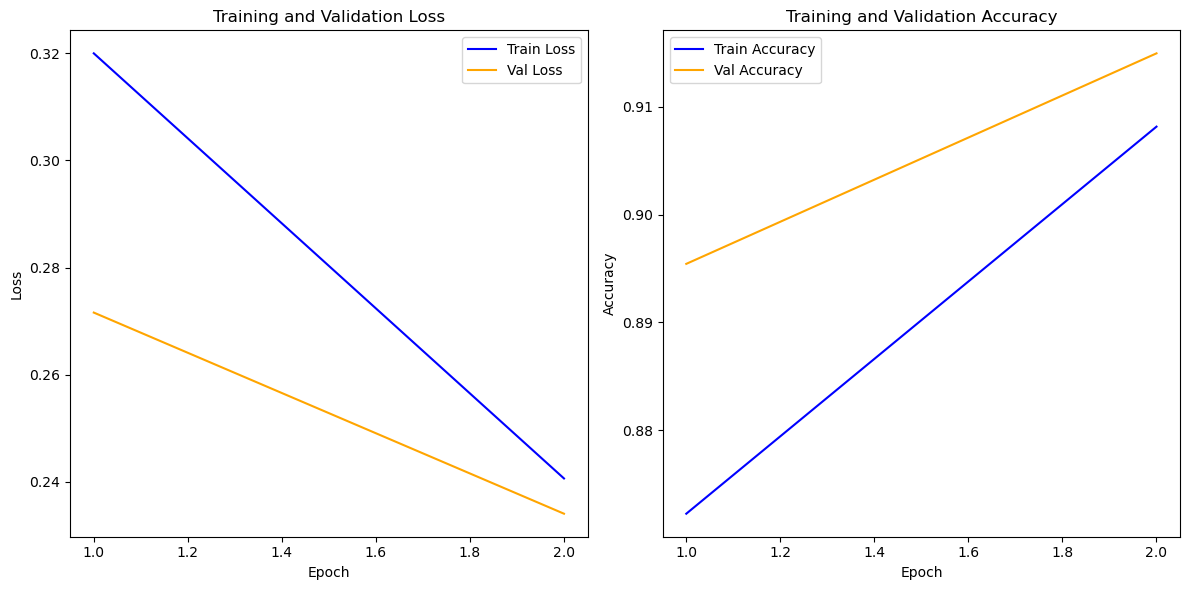

In [12]:
epochs = len(trainer.training_stats['train_loss'])
train_acc = [acc.cpu().item() if isinstance(acc, torch.Tensor) else acc for acc in trainer.training_stats['train_acc']]
val_acc = [acc.cpu().item() if isinstance(acc, torch.Tensor) else acc for acc in trainer.training_stats['val_acc']]

print("Max Train Accuracy:", max(train_acc))
print("Max Val Accuracy:", max(val_acc))

plt.figure(figsize=(12, 6))

# Plot Loss
plt.subplot(1, 2, 1)
plt.plot(range(1, epochs + 1), trainer.training_stats['train_loss'], label='Train Loss', color='blue')
plt.plot(range(1, epochs + 1), trainer.training_stats['val_loss'], label='Val Loss', color='orange')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot Accuracy
plt.subplot(1, 2, 2)
plt.plot(range(1, epochs + 1), train_acc, label='Train Accuracy', color='blue')
plt.plot(range(1, epochs + 1), val_acc, label='Val Accuracy', color='orange')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()